#**VISUALIZATION HATE SPEECH DATASET**

The dataset is uploaded directly from a HuggingFace directory. The link below  
shows the link to the
https://huggingface.co/datasets/manueltonneau/spanish-hate-speech-superset

This dataset is a binary classification dataset that contains Spanish-language social media posts labeled for hate speech. Each instance is categorized as either:

0.00 → Non-hate speech

1.00 → Hate speech


# Load dataset for dataframe

Download HuggingFace dataset directly from the Internet

In [ ]:
from huggingface_hub import login
import os

def login_huggingface(token):
    #log in to Hugging Face using the token
    login(token)
    print("Logged in successfully!")

if __name__ == "__main__":
    token = os.getenv("HF_TOKEN")
    login_huggingface(token)


Logged in successfully!


In [ ]:
import pandas as pd

df = pd.read_csv("hf://datasets/manueltonneau/spanish-hate-speech-superset/es_hf_102024.csv")

In [ ]:
print(df.columns)

Index(['text', 'labels', 'source', 'dataset', 'nb_annotators', 'tweet_id',
       'post_author_country_location'],
      dtype='object')


Checking the dataset

In [ ]:
print(df.head)

<bound method NDFrame.head of                                                     text  labels   source  \
0      Eran tan pero tan feministas que invisibilizab...     0.0  Twitter   
1      @USER @USER @USER Me carga en lo q se convirti...     0.0  Twitter   
2      , ¿Sabrán las femiorcas como @USER y todo el f...     1.0  Twitter   
3      @USER @USER @USER @USER Una vecina que nada te...     0.0  Twitter   
4       @USER Debajo de que piedra estaba ese flaiterio?     0.0  Twitter   
...                                                  ...     ...      ...   
29850  Un debate interesante ¿las mujeres occidentale...     0.0  Twitter   
29851  @USER @USER De todo esto y leyendo las respues...     0.0  Twitter   
29852  @USER @USER la reina respeta la religión musul...     0.0  Twitter   
29853  "Las decisiones económicas son exclusivas del ...     0.0  Twitter   
29854             @USER y pq te consideras de gibraltar?     0.0  Twitter   

        dataset  nb_annotators      tweet_id 

Remove unnecessary columns and keep the columns "text" and "labels", as the main information is in these two columns.

In [ ]:
columns_to_drop = ['source', 'nb_annotators', 'tweet_id', 'post_author_country_location', 'dataset']
df = df.drop(columns=columns_to_drop)

print(df.head(20))


                                                 text  labels
0   Eran tan pero tan feministas que invisibilizab...     0.0
1   @USER @USER @USER Me carga en lo q se convirti...     0.0
2   , ¿Sabrán las femiorcas como @USER y todo el f...     1.0
3   @USER @USER @USER @USER Una vecina que nada te...     0.0
4    @USER Debajo de que piedra estaba ese flaiterio?     0.0
5   @USER Esto lo vengo diciendo desde el voto obl...     0.0
6   Que un militar te diga:"amigo mejor entre la b...     0.0
7   @USER Por esto lados muchos flaites de pelo pi...     0.0
8   @USER Haber, pensando en la cantidad de flaite...     0.0
9   @USER @USER @USER @USER Entiendo. Haces refere...     0.0
10  @USER @USER Jueron loh pacohhh..típica frase d...     0.0
11  @USER @USER FUERA LOS FLAITES !!!\nFUERA LOS 3...     0.0
12  @USER Todos los flaites pueden quedarse en su ...     0.0
13                  @USER Pero alla no tienen flaites     0.0
14  @USER No será musho? No se trata de “rotos” cr...     0.0
15  Los 

Check shape of our current dataset

In [ ]:
print(df.shape)

(29855, 2)


Mount Google Drive content

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Save the dataset in a CSV file

In [ ]:
save_path = "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/dataset/hatespeech_dataset.csv"

df.to_csv(save_path, index=False)

print(f"Dataset saved to: {save_path}")


Dataset saved to: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/dataset/hatespeech_dataset.csv


In [ ]:
import re
import nltk
nltk.download('stopwords')

import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

spanish_stopwords = set(stopwords.words('spanish'))

def cleanup(tweet):
    """
    Remove URLs, hashtags, mentions, emojis, and replaces newlines and tabulations with spaces.
    Converts the text to lowercase and removes Spanish stopwords.

    :param tweet: Text string representing a tweet.
    :return: Cleaned tweet as a text string.
    """
    #Remove URLs
    tweet = re.sub(r"http\S+", "", tweet)

    #Remove hashtags and mentions
    tweet = tweet.replace("#", "").replace("@", "")

    #Remove non-ASCII characters (like emojis)
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)

    #Replace newlines and tabulations with spaces
    tweet = tweet.replace('\n', ' ').replace('\t', ' ')

    #Convert to lowercase
    tweet = tweet.lower()

    #Remove Spanish stopwords
    tweet_words = tweet.split()  # Split the tweet into words
    tweet_words = [word for word in tweet_words if word not in spanish_stopwords]  # Remove stopwords

    #Rejoin words back into a cleaned tweet
    tweet = ' '.join(tweet_words)

    return tweet

# Apply the cleanup function to your DataFrame
df['text'] = df['text'].apply(cleanup)

print(df.head(20))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                 text  labels
0   tan tan feministas invisibilizaban constanteme...     0.0
1   user user user carga q convirti 2da vuelta gob...     0.0
2   , sabrn femiorcas user flaiterio mapuchento , ...     1.0
3   user user user user vecina tenia ver flaiterio...     0.0
4                       user debajo piedra flaiterio?     0.0
5   user vengo diciendo voto obligado piera. dejem...     0.0
6   militar diga:"amigo mejor bicicleta pase votar...     0.0
7                     user lados flaites pelo pintado     0.0
8   user haber, pensando cantidad flaites ignorant...     0.0
9   user user user user entiendo. haces referencia...     0.0
10  user user jueron loh pacohhh..tpica frase loa ...     0.0
11     user user flaites !!! 34 macabros mapocho link     0.0
12  user flaites pueden quedarse casa sacandose mo...     0.0
13                                  user alla flaites     0.0
14  user ser musho? trata rotos creo yo. trata fla...     0.0
15  desc

After cleaning, remove those columns with NaN information

In [ ]:
df = df.dropna()

Save the cleaned dataset in another CSV file

In [ ]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/dataset/hatespeech_cleaned.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/dataset/hatespeech_cleaned.csv')


In [ ]:
!pip install scattertext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.4 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9300 sha256=ca7bf512f8f01e06654c85f47eaadb3918c3d24bfea621d70ebcfa1da2f8c692
  Stored in directory: /root/.cache/pip/wheels/49/20/47/f03dfa8a7239c54cbc44ff7389eefbf888d2c1873edaaec888
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found exis

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/dataset/hatespeech_cleaned.csv')
#df_downsampled = df.sample(frac=0.4, random_state=42)  # frac=0.4 means 40% of the data ()
print(df.head())

                                                text  labels
0  tan tan feministas invisibilizaban constanteme...     0.0
1  user user user carga q convirti 2da vuelta gob...     0.0
2  , sabrn femiorcas user flaiterio mapuchento , ...     1.0
3  user user user user vecina tenia ver flaiterio...     0.0
4                      user debajo piedra flaiterio?     0.0


In [ ]:
import scattertext as st
import spacy
from pprint import pprint

In [ ]:
# Create the corpus
corpus = st.CorpusFromPandas(df, category_col='labels', text_col='text').build()

In [ ]:
term_freq_df = corpus.get_term_freq_df()

print(term_freq_df.head(40))

#words in your corpus for two categories: "Hate Speech" (1.0) and "Non-Hate Speech" (0.0). Each row corresponds to a specific term (word or phrase) and the frequency with which that term occurs in both categories.

                                0.0 freq  1.0 freq
term                                              
tan                                  560       161
feministas                            92        46
invisibilizaban                        1         0
constantemente                         8         2
trabajadoras                           8         0
sexuales                              29         8
hacindole                              5         1
creer                                 62        11
mundo                                355        99
incapaces                              8         2
decidir                               18         6
cada                                 278        75
vez                                  526       140
ejercan                                1         0
derecho                              135        30
hacerlo                               47         5
siendo                               161        41
violadas                       

In [ ]:
#Get scaled F-scores
term_freq_df['hate_speech'] = corpus.get_scaled_f_scores('1.0')  #For hate speech class

#Sort the terms by the score
sorted_terms = term_freq_df.sort_values(by='hate_speech', ascending=False)

#View the top 10 terms for hate speech
print(list(sorted_terms.index[:10]))


['cllate perra', 'payasa', 'joto', 'sudacas', 'callate zorra', 'feminazis', 't perra', 'pattica', 'cllate zorra', 'manteros']


In [ ]:
#Get scaled F-scores
term_freq_df['non_hate_speech'] = corpus.get_scaled_f_scores('0.0')  # For non-hate speech class

#Sort the terms by the score
sorted_terms = term_freq_df.sort_values(by='non_hate_speech', ascending=False)

#View the top 10 terms for hate speech
print(list(sorted_terms.index[:10]))

['maripan', 'ctm', 'refugiadas', 'aweonao', 'bolsonaro', '|', 'arandina', 'culiao', 'culiaos', 'weon']


VISUALIZATION

In [ ]:
#Generate the Scattertext explorer visualization with a different setup
html = st.produce_scattertext_explorer(corpus,
                                       category='0.0',
                                       category_name='Non-Hate Speech',  #name for the 'non-hate speech' category
                                       not_category_name='Hate Speech',  #name for the 'hate speech' category
                                       width_in_pixels=1200,  #adjust the width
                                       metadata=df['text'])

#Save the HTML output
with open("scattertext_alternate_output.html", "w") as f:
    f.write(html)



In [ ]:
from google.colab import files

#Move the file to the appropriate location (optional)
files.download("scattertext_alternate_output.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

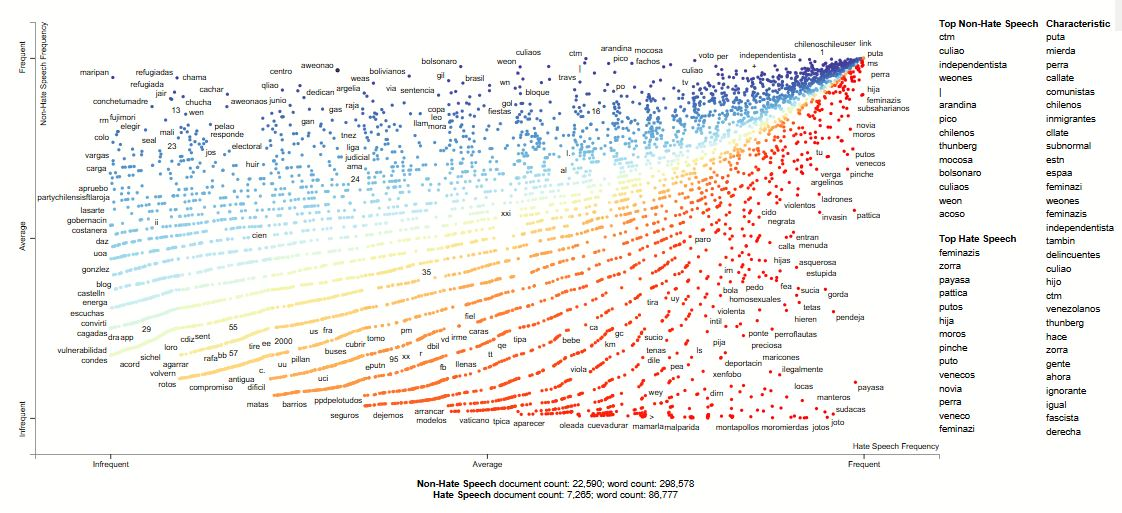